In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='bert-base-uncased'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'wd':[]}

In [4]:
g = 8
lr = 1.0e-5
weight_decay = [0.1, 0.01]

for wd in weight_decay:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, focal loss gamma {g}, weight decay {wd}')
    data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=wd,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       focalloss=True,
                                                       gamma=g,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['wd'].append(wd)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search bert-base-uncased, learning rate 1e-05, focal loss gamma 8, weight decay 0.1


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.1401	Val Loss:	1.0363	Accuracy:	0.5546	F1:	0.5527
2 / 30: Train Loss:	0.1013	Val Loss:	0.9806	Accuracy:	0.7059	F1:	0.6932
3 / 30: Train Loss:	0.0830	Val Loss:	0.9341	Accuracy:	0.7311	F1:	0.7170
4 / 30: Train Loss:	0.0646	Val Loss:	0.8890	Accuracy:	0.7395	F1:	0.7301
5 / 30: Train Loss:	0.0460	Val Loss:	0.8491	Accuracy:	0.7563	F1:	0.7462
6 / 30: Train Loss:	0.0270	Val Loss:	0.8048	Accuracy:	0.7563	F1:	0.7462
7 / 30: Train Loss:	0.0210	Val Loss:	0.7775	Accuracy:	0.7479	F1:	0.7367
8 / 30: Train Loss:	0.0174	Val Loss:	0.7372	Accuracy:	0.7479	F1:	0.7403
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.77      0.63      0.70        38
oversimplification       0.80      0.67      0.73        36
slothful induction       0.72      0.93      0.82        45

          accuracy                           0.76       119
         macro avg       0.77     

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a BertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	0.1401	Val Loss:	1.0363	Accuracy:	0.5546	F1:	0.5527
2 / 30: Train Loss:	0.1013	Val Loss:	0.9806	Accuracy:	0.7059	F1:	0.6932
3 / 30: Train Loss:	0.0830	Val Loss:	0.9341	Accuracy:	0.7311	F1:	0.7170
4 / 30: Train Loss:	0.0646	Val Loss:	0.8890	Accuracy:	0.7395	F1:	0.7301
5 / 30: Train Loss:	0.0459	Val Loss:	0.8494	Accuracy:	0.7563	F1:	0.7462
6 / 30: Train Loss:	0.0270	Val Loss:	0.8045	Accuracy:	0.7563	F1:	0.7462
7 / 30: Train Loss:	0.0210	Val Loss:	0.7745	Accuracy:	0.7395	F1:	0.7290
8 / 30: Train Loss:	0.0186	Val Loss:	0.7437	Accuracy:	0.7731	F1:	0.7651
9 / 30: Train Loss:	0.0108	Val Loss:	0.7307	Accuracy:	0.7731	F1:	0.7695
10 / 30: Train Loss:	0.0125	Val Loss:	0.7181	Accuracy:	0.7563	F1:	0.7547
11 / 30: Train Loss:	0.0078	Val Loss:	0.7029	Accuracy:	0.7563	F1:	0.7503
12 / 30: Train Loss:	0.0036	Val Loss:	0.6912	Accuracy:	0.7731	F1:	0.7699
13 / 30: Train Loss:	0.0036	Val Loss:	0.6773	Accuracy:	0.7647	F1:	0.7617
14 / 30: Train Loss:	0.0030	Val Loss:	0.6708	Accuracy:	0.764

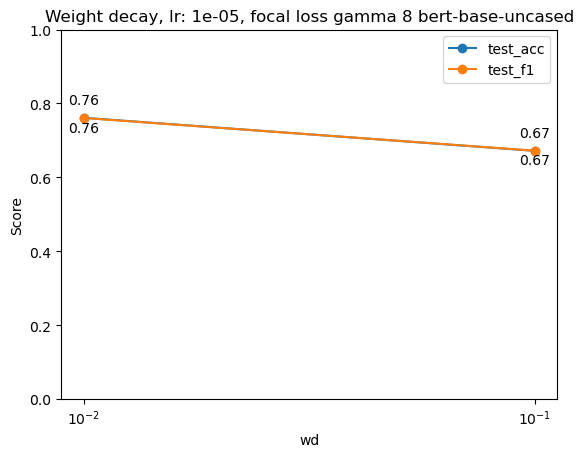

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Weight decay, lr: {lr}, focal loss gamma {g} {model_checkpoint}',
                        column='wd',
                        sci_format=True)

In [6]:
%reset -f